# Metodos de ensamble

# Bagging - Boosting

## Lectura data informacion

In [46]:
# Se toma el data set wine para hacer prediccion de las clases Alcohol y Hue

import pandas as pd
df_wine = pd.read_csv('wine.csv')
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash',
                   'Alcalinity of ash','Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine = df_wine[df_wine['Class label'] != 1] 
y = df_wine['Class label'].values 
X = df_wine[['Alcohol', 'Hue']].values

## Codificacion de clases y reparticion de la informacion

In [47]:
### Se codifican las clases en formato binario y se crea el insumo de entrenamiento 
### y prueba a tener en cuenta en la modelacion

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
le = LabelEncoder() 
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

# Pregunta: Que realiza la funcion LabelEncoder ?

## Instanciando BaggingClassifier

In [48]:
### scikit-lean tiene implementado el algoritmo BaggingClassifier.
### Lo importamos desde el modulo ensemble. 

from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True, 
                        bootstrap_features=False, n_jobs=1, random_state=1)

ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, random_state=1)

### utiliza arboles sin poda como el clasificador base y crear un ensamble a partir de el
### con 500 arboles entrenados con diferentes muestras extraidas de la base de datos de entrenamiento.


## Evaluando rendimientos de un arbol

In [49]:
from sklearn.metrics import accuracy_score 

# entrenar un arbol
tree.fit(X_train, y_train)

# Realizar inferencia con el arbol
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Estimar el accuracy
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

# Discusion: El arbol predice correctamente las clases de la base de datos de entrenamiento,
# sin embargo tiene dificultades con la base de entrenamiento de prueba.

Decision tree train/test accuracies 0.944/0.833


## Evaluando rendimientos de un modelo ensamblado de arboles

In [50]:
# Entrenar un ensamble Bagging
bag.fit(X_train, y_train)

# Realizar inferencia con el arbol
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

# Estimar el accuracy
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

# Pregunta: Que difieren estos rendimientos respecto a los del arbol ?

Bagging train/test accuracies 0.902/0.930


In [51]:
import numpy as np

x_min = X_train[:, 0].min() - 1 
x_max = X_train[:, 0].max() + 1 
y_min = X_train[:, 1].min() - 1 
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

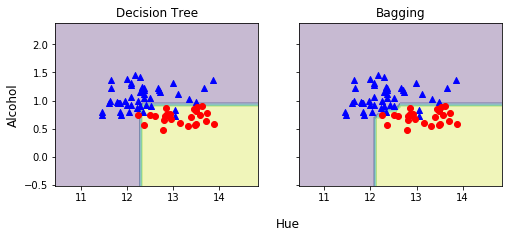

In [52]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(8, 3))

for idx, clf, tt in zip([0, 1],[tree, bag],['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                       X_train[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                       X_train[y_train==1, 1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12) 
plt.text(10.2, -1.2,
         s='Hue',ha='center',
         va='center',
         fontsize=12) 
plt.show()

## Instanciando AdaBoost

## Evaluando rendimientos de un modelo ensamblado de arboles (AdaBoost)

In [53]:
from sklearn.ensemble import AdaBoostClassifier 

# Instanciar y entrenar un ensamble boosting ada
ada.fit(X_train, y_train)

# Realizar inferencia con el arbol
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Estimar el accuracy
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print('Boosting train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

# Pregunta: Que difieren estos rendimientos respecto a los del arbol ?

Boosting train/test accuracies 1.000/0.875


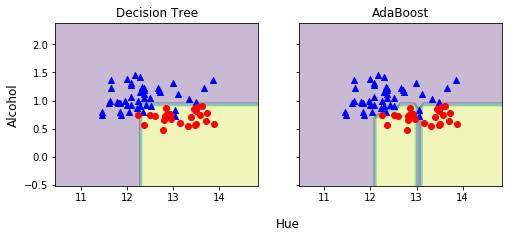

In [54]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(8, 3))

for idx, clf, tt in zip([0, 1],[tree, ada],['Decision Tree', 'AdaBoost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                       X_train[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                       X_train[y_train==1, 1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12) 
plt.text(10.2, -1.2,
         s='Hue',ha='center',
         va='center',
         fontsize=12) 
plt.show()